In [5]:
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import ray
import matplotlib as plt

In [6]:
# Read AUDUSD data file
raw_data = pd.read_csv("/home/ujwal/Python Program/Exp-On-Supervised-ML-Algorithms /Regression/AUDUSD_Candlestick_1_Hour_BID_03.09.2007-01.10.2022.csv")
raw_data

,Gmt time,Open,High,Low,Close,Volume
0,03.09.2007 00:00:00.000,0.82127,0.82207,0.82057,0.82157,184.95
1,03.09.2007 01:00:00.000,0.82147,0.82287,0.82097,0.82237,310.37
2,03.09.2007 02:00:00.000,0.82227,0.82367,0.82187,0.82267,419.97
3,03.09.2007 03:00:00.000,0.82287,0.82387,0.82157,0.82327,367.18
4,03.09.2007 04:00:00.000,0.82337,0.82387,0.82127,0.82157,257.45
...,...,...,...,...,...,...
132187,01.10.2022 19:00:00.000,0.64023,0.64023,0.64023,0.64023,0.00
132188,01.10.2022 20:00:00.000,0.64023,0.64023,0.64023,0.64023,0.00
132189,01.10.2022 21:00:00.000,0.64023,0.64023,0.64023,0.64023,0.00
132190,01.10.2022 22:00:00.000,0.64023,0.64023,0.64023,0.64023,0.00


In [31]:
# drop everything except Time and Close information
from bleach import clean
from matplotlib.pyplot import plot


clean_data = raw_data.drop(["High", "Open", "Low", "Volume"], axis=1)
clean_data = clean_data.set_index('Gmt time')
clean_data
#clean_data.plot()

,Close
Gmt time,
03.09.2007 00:00:00.000,0.82157
03.09.2007 01:00:00.000,0.82237
03.09.2007 02:00:00.000,0.82267
03.09.2007 03:00:00.000,0.82327
03.09.2007 04:00:00.000,0.82157
...,...
01.10.2022 19:00:00.000,0.64023
01.10.2022 20:00:00.000,0.64023
01.10.2022 21:00:00.000,0.64023


In [34]:

# Drop row that has all NaN values
df=clean_data.dropna(how='all')


In [13]:
# visually data is non stationary
# Lets do Dickey-fuller test for conformation
# if P<0.05= stationary or it is not stationary
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(clean_data)
print('pvalue of adfuller test is: ', adftest[1])

pvalue of adfuller test is:  0.6414140450092467


<AxesSubplot:xlabel='Gmt time'>

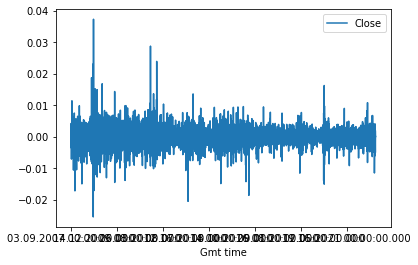

In [35]:
# Lets try differencing to remove trend
df1 = df.diff()
df1.plot()

/home/ujwal/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/ujwal/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


<AxesSubplot:xlabel='Gmt time'>

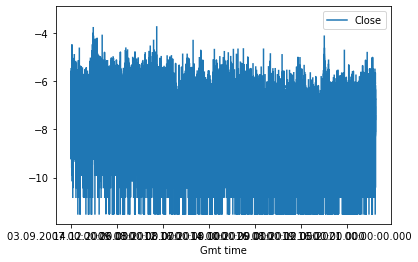

In [36]:
df2 = np.log(df1)
df2.plot()

In [38]:
# visually data is non stationary
# Lets do Dickey-fuller test for conformation
# if P<0.05= stationary or it is not stationary
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(df2)
print('pvalue of adfuller test is: ', adftest[1])

/home/ujwal/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:1292: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


MissingDataError: exog contains inf or nans

In [8]:
# It deosn't make that much difference by normalizing it, still lets do it.
clean_data = clean_data["Close"].np.reshape(-1, 1)
normalized_data = preprocessing.normalize(clean_data["Close"])
print("Normalized Data = ", normalized_data)
clean_data.plot()

AttributeError: 'Series' object has no attribute 'np'

In [ ]:
# Make data stationary


In [ ]:
# Use Standardization or normalization


In [ ]:
# Split dataset to train, val, test as 70%-15%-15%


In [ ]:
# Initialize the algorithm
model = LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)

SyntaxError: invalid syntax (890996178.py, line 2)

In [ ]:
# Tune the linear regression parameter 
#ray.tune.sklearn.TuneGridSearchCV(estimator, param_grid, early_stopping=None, scoring=None, n_jobs=None, cv=5, refit=True,
# verbose=0, error_score='raise', return_train_score=False, local_dir='~/ray_results',
# name=None, max_iters=1, use_gpu=False, loggers=None, pipeline_auto_early_stop=True, stopper=None, time_budget_s=None, sk_n_jobs=None, mode=None)

parameter_grid = {"fit_intercept": (True, False), "copy_X": (True, False), "positive": (True, False) }
sklearn_search = GridSearchCV(LinearRegression(), parameter_grid, n_jobs=n_jobs)

start = time.time()
sklearn_search.fit(x_train, y_train)
end = time.time()
print("Sklearn Fit Time:", end - start)
print(sklearn_search.best_params_)
# Sklearn Fit Time: 47.48055911064148 (for an 8 core laptop)


#digits = datasets.load_digits()
#x = digits.data
#y = digits.target
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#clf = SGDClassifier()

#tune_search = TuneSearchCV(
#    clf,
#    parameter_grid,
#    search_optimization="bayesian",
#    n_trials=3,
#    early_stopping=True,
#    max_iters=10,
#)
#tune_search.fit(x_train, y_train)
#print(tune_search.best_params_)
# {'alpha': 0.37460266483547777, 'epsilon': 0.09556428757689246}

AttributeError: module 'ray' has no attribute 'tune'

In [ ]:
# Train the algorithm


In [ ]:
# Check mse using Linear regression


In [ ]:
# save model using pickle


In [ ]:
# Reload model show performance graph
